# Bag of Words + TF-IDF


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample statement
statement = "It is true that bananas have no bones, and I do like bananas, but I like bananas because they are tasty and healthy, not because they have no bones."

# Bag of Words
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform([statement])
bow_embeddings = bow_matrix.toarray()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([statement])
tfidf_embeddings = tfidf_matrix.toarray()

# Vocabulary and words in the statement
vocabulary = bow_vectorizer.get_feature_names_out()
words_in_statement = bow_vectorizer.inverse_transform(bow_matrix)

# Print the matrix
print("{:<20} {:<15} {:<15}".format("Word", "BoW Embedding", "TF-IDF Value"))
print("-" * 50)
for word, bow_embedding, tfidf_value in zip(words_in_statement[0], bow_embeddings[0], tfidf_embeddings[0]):
    print("{:<20} {:<15} {:<15}".format(word, bow_embedding, tfidf_value))


Word                 BoW Embedding   TF-IDF Value   
--------------------------------------------------
it                   2               0.2917299829957891
is                   1               0.14586499149789456
true                 3               0.4375949744936837
that                 2               0.2917299829957891
bananas              2               0.2917299829957891
have                 1               0.14586499149789456
no                   1               0.14586499149789456
bones                2               0.2917299829957891
and                  1               0.14586499149789456
do                   1               0.14586499149789456
like                 1               0.14586499149789456
but                  2               0.2917299829957891
because              2               0.2917299829957891
they                 1               0.14586499149789456
are                  1               0.14586499149789456
tasty                1               0.145864991

# Word2Vec

In [24]:
import pandas as pd
from gensim.models import Word2Vec
import multiprocessing
import re

def clean_data(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    return text
def change_lower(text):
    text = text.lower()
    return text

# Sample statement
statement = "My husband and I have stayed in this hotel a few times. Though not the fanciest hotel, we love the fact that we can walk the — or so miles to Fenway. It is clean and the staff is very accomodating. My only complaint is that the fan in the bathroom was noisy and went on automatically when you turned the light on and we tried to keep the light off as much as possible. We’ve stayed in pricier hotels which charged for internet and breakfast and these are both included. Will stay there again."
statement=change_lower(clean_data(statement))
# Split the statement into a list of words
list1 = statement.split(" ")

# Number of CPU cores
cores = multiprocessing.cpu_count()

# Word2Vec model
w2v_model = Word2Vec(min_count=1, window=4, alpha=0.5, min_alpha=0.01, sg=1, workers=cores-1, vector_size=20)

# Build vocabulary
w2v_model.build_vocab([list1], progress_per=1)

# Train the model
w2v_model.train([list1], total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

# Accessing the word vectors from the trained Word2Vec model
word_vectors = w2v_model.wv

# Print all words and their embeddings
for word, vector in zip(word_vectors.index_to_key, word_vectors.vectors):
    print(f"Word: {word}, Embedding: {vector}")


Word: the, Embedding: [ 3.0954114e-01 -2.0243409e-01  5.3607351e-01 -1.8367596e-01
 -1.9471551e-01 -3.9810490e-02  1.7674601e-02  2.7781463e-01
 -5.2775824e-01 -3.7576661e-01  1.9490549e-01  4.1123220e-01
  3.4221803e-04 -3.9642066e-02  2.3383462e-01  3.7586298e-02
  4.4719059e-02 -2.1145357e-01 -2.2731698e-01  2.5016546e-02]
Word: and, Embedding: [ 0.20653361 -0.06662817  0.6084671  -0.2189865   0.00546961 -0.03050863
 -0.12527655  0.2580551  -0.62584776 -0.3373248   0.17956457  0.11303718
  0.13132909  0.03119885  0.3033488  -0.20946021 -0.02093209 -0.12727095
 -0.1381686   0.04589419]
Word: is, Embedding: [ 0.4088183  -0.22548738  0.5806148  -0.15424655 -0.13774385 -0.02148226
  0.06257965  0.21157208 -0.44057155 -0.43045455  0.26371798  0.53058225
  0.07179383 -0.15180649  0.18669423  0.11821133  0.00703158 -0.28549555
 -0.19381432  0.10919772]
Word: in, Embedding: [ 0.3180186  -0.09118367  0.5210892  -0.32716325 -0.02719159 -0.09302303
 -0.08217827  0.3338548  -0.5447128  -0.41325

**min_count** : The minimum number of occurrences of the target word in the corpus. Especially for very large copruses, keeping this limit high increases the success even more. However, it would be more accurate to keep it small for small datasets.

**window** : It is the number of neighboring words that will directly affect the vector calculations of the target expression. For example, “He is a very good person.” For window =1 , the words “a” and “good” are effective in the formation of the “very” word vector. When window = 2, the words “is”,“a”,“good” and “person” are effective in creating the “very” word vector.

**vector_size** : It is the size of the vector to be created for each element.

**alpha** : Initial learning rate

**min_alpha** : It is the minimum value at which the learning rate will decrease linearly during training.

**sg** : Specifies how the training algorithm will work. If value of sg is 1, skip-gram algorithm is used, otherwise the CBOW algorithm is used.

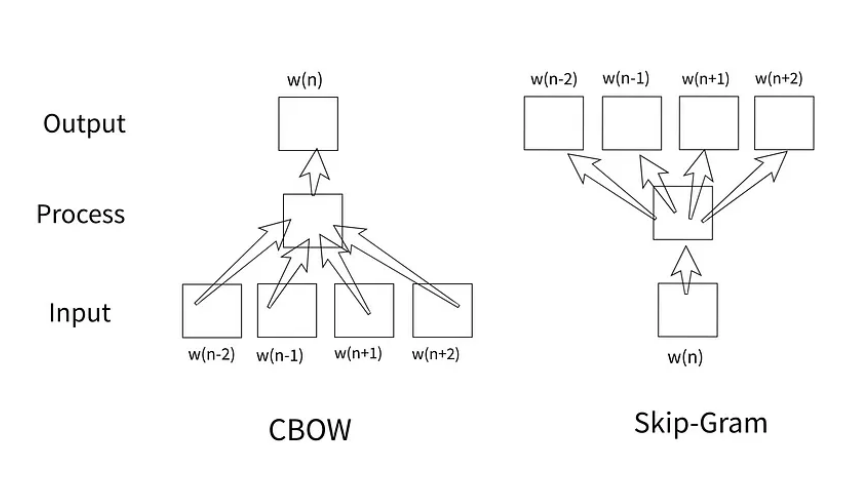


In the trainings in which the CBOW algorithm is used, the words adjacent to the target word are given as input and the target word itself is obtained as output. In the skip-gram algorithm, while the target word itself is given as input, neighboring words are obtained as output.

**workers** : Traning can be performed in parallel. The number of cores to be used for this can be determined with the workers parameter.

In [25]:
w2v_model.wv.most_similar(positive=["noisy"])

[('when', 0.9829676151275635),
 ('light', 0.9490414261817932),
 ('turned', 0.9487941265106201),
 ('you', 0.9463159441947937),
 ('automatically', 0.9450187683105469),
 ('on', 0.938075065612793),
 ('went', 0.9371446967124939),
 ('was', 0.9254831075668335),
 ('tried', 0.9176845550537109),
 ('off', 0.8938882350921631)]

In [27]:
w2v_model.wv.most_similar(positive=["again"])

[('will', 0.9920983910560608),
 ('there', 0.9840273261070251),
 ('are', 0.9762140512466431),
 ('included', 0.9742386341094971),
 ('internet', 0.9733234643936157),
 ('for', 0.9722768068313599),
 ('hotels', 0.9651316404342651),
 ('pricier', 0.9605882167816162),
 ('charged', 0.9567830562591553),
 ('stayed', 0.9527344703674316)]

# Glove

**The advantage of GloVe is that, unlike Word2vec,  GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors.**

In [28]:
print(statement)

my husband and i have stayed in this hotel a few times though not the fanciest hotel we love the fact that we can walk the  or so miles to fenway it is clean and the staff is very accomodating my only complaint is that the fan in the bathroom was noisy and went on automatically when you turned the light on and we tried to keep the light off as much as possible weve stayed in pricier hotels which charged for internet and breakfast and these are both included will stay there again


And the ratio of co-occurrence probabilities as:

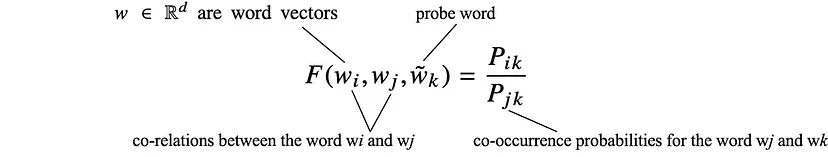

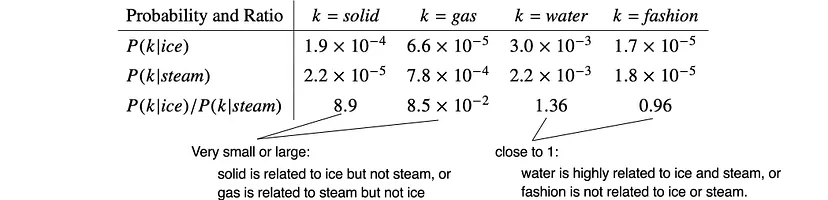

Given a probe word, the ratio can be small, large or equal to 1 depends on their correlations. For example, if the ratio is large, the probe word is related to wᵢ but not wⱼ. This ratio gives us hints on the relations between three different words. Intuitively, this is somewhere between a bi-gram and a 3-gram.

Now, we want to develop a model for F given some desirable behavior we want for the embedding vector w. As discussed before, linearity is important in the word embedding concept. So if a system is trained on this principle, we should expect that F can be reformulated as:

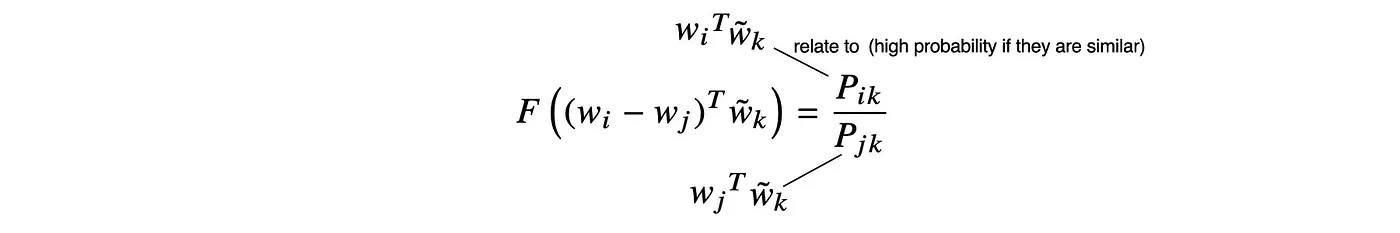

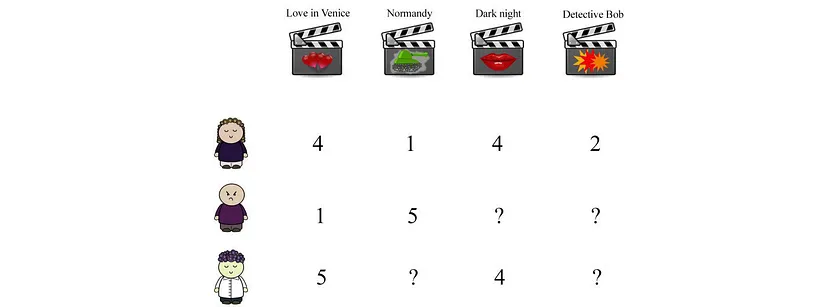

In [30]:
print(list1)

['my', 'husband', 'and', 'i', 'have', 'stayed', 'in', 'this', 'hotel', 'a', 'few', 'times', 'though', 'not', 'the', 'fanciest', 'hotel', 'we', 'love', 'the', 'fact', 'that', 'we', 'can', 'walk', 'the', '', 'or', 'so', 'miles', 'to', 'fenway', 'it', 'is', 'clean', 'and', 'the', 'staff', 'is', 'very', 'accomodating', 'my', 'only', 'complaint', 'is', 'that', 'the', 'fan', 'in', 'the', 'bathroom', 'was', 'noisy', 'and', 'went', 'on', 'automatically', 'when', 'you', 'turned', 'the', 'light', 'on', 'and', 'we', 'tried', 'to', 'keep', 'the', 'light', 'off', 'as', 'much', 'as', 'possible', 'weve', 'stayed', 'in', 'pricier', 'hotels', 'which', 'charged', 'for', 'internet', 'and', 'breakfast', 'and', 'these', 'are', 'both', 'included', 'will', 'stay', 'there', 'again']


In [ ]:
# download glove and unzip it in Notebook.
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

In [36]:

# code for Glove word embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list1)

# Number of unique words in the dictionary
print("Number of unique words in dictionary =", len(tokenizer.word_index))

# Load GloVe embeddings
glove_filepath = '/content/glove.6B.50d.txt'  # Update with the correct path to your GloVe file
embedding_dim = 50

# Function to create embedding matrix for vocabulary
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

# Generate embedding matrix for the vocabulary
embedding_matrix_vocab = embedding_for_vocab(glove_filepath, tokenizer.word_index, embedding_dim)

# Print dense vectors for all words
for word, idx in tokenizer.word_index.items():
    print(f"Word: {word} Dense Vector: {embedding_matrix_vocab[idx]}")

Number of unique words in dictionary = 68
Word: the Dense Vector: [ 4.18000013e-01  2.49679998e-01 -4.12420005e-01  1.21699996e-01
  3.45270008e-01 -4.44569997e-02 -4.96879995e-01 -1.78619996e-01
 -6.60229998e-04 -6.56599998e-01  2.78430015e-01 -1.47670001e-01
 -5.56770027e-01  1.46579996e-01 -9.50950012e-03  1.16579998e-02
  1.02040000e-01 -1.27920002e-01 -8.44299972e-01 -1.21809997e-01
 -1.68009996e-02 -3.32789987e-01 -1.55200005e-01 -2.31309995e-01
 -1.91809997e-01 -1.88230002e+00 -7.67459989e-01  9.90509987e-02
 -4.21249986e-01 -1.95260003e-01  4.00710011e+00 -1.85939997e-01
 -5.22870004e-01 -3.16810012e-01  5.92130003e-04  7.44489999e-03
  1.77780002e-01 -1.58969998e-01  1.20409997e-02 -5.42230010e-02
 -2.98709989e-01 -1.57490000e-01 -3.47579986e-01 -4.56370004e-02
 -4.42510009e-01  1.87849998e-01  2.78489990e-03 -1.84110001e-01
 -1.15139998e-01 -7.85809994e-01]
Word: and Dense Vector: [ 0.26818001  0.14346001 -0.27877     0.016257    0.11384     0.69923002
 -0.51332003 -0.4736799

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to find top similar words for a given word
def top_similar_words(word, word_index, embedding_matrix, top_n=10):
    if word not in word_index:
        print(f"{word} is not in the vocabulary.")
        return

    idx = word_index[word]
    word_vector = embedding_matrix[idx].reshape(1, -1)

    # Calculate cosine similarity between the given word and all other words
    similarities = cosine_similarity(word_vector, embedding_matrix)[0]

    # Get indices of top similar words
    similar_word_indices = similarities.argsort()[:-top_n-1:-1]

    # Print top similar words
    print(f"Top {top_n} similar words to '{word}':")
    for i, similar_idx in enumerate(similar_word_indices):
        similar_word = list(word_index.keys())[list(word_index.values()).index(similar_idx)]
        print(f"{i + 1}. {similar_word} (Similarity: {similarities[similar_idx]:.4f})")

# Example: Print top 10 similar words to a given word
example_word = "noisy"
top_similar_words(example_word, tokenizer.word_index, embedding_matrix_vocab, top_n=5)


Top 5 similar words to 'noisy':
1. noisy (Similarity: 1.0000)
2. light (Similarity: 0.4568)
3. fan (Similarity: 0.4562)
4. walk (Similarity: 0.4319)
5. few (Similarity: 0.4273)


# BERT(Bidirectional Encoder Representations from Transformers)

we will use BERT to extract features, namely word and sentence embedding vectors, from text data. What can we do with these word and sentence embedding vectors? First, these embeddings are useful for keyword/search expansion, semantic search and information retrieval. For example, if you want to match customer questions or searches against already answered questions or well documented searches, these representations will help you accuratley retrieve results matching the customer’s intent and contextual meaning, even if there’s no keyword or phrase overlap.

In [38]:
!pip install transformers

In [40]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [41]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [42]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


In [44]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [45]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [46]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [47]:
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on
    # how it's  configured in the `from_pretrained` call earlier. In this case,
    # becase we set `output_hidden_states = True`, the third item will be the
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [48]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


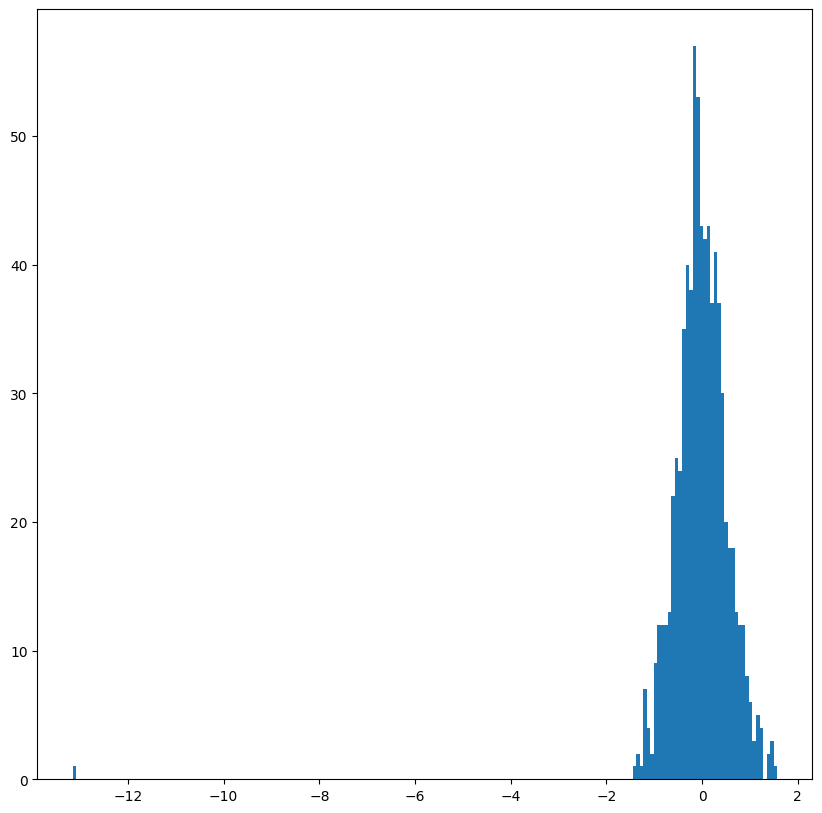

In [49]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [50]:
# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

Tensor shape for each layer:  torch.Size([1, 22, 768])


In [51]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 22, 768])

In [52]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 22, 768])

In [53]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([22, 13, 768])

In [54]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)

    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 22 x 768


### Sentence Vectors

In [55]:
# `hidden_states` has shape [13 x 1 x 22 x 768]

# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

In [56]:
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


### Evaluation

In [57]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [58]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vecs_sum[6][:5]))
print("bank robber  ", str(token_vecs_sum[10][:5]))
print("river bank   ", str(token_vecs_sum[19][:5]))

First 5 vector values for each instance of "bank".

bank vault    tensor([ 3.3596, -2.9805, -1.5421,  0.7065,  2.0031])
bank robber   tensor([ 2.7359, -2.5577, -1.3094,  0.6797,  1.6633])
river bank    tensor([ 1.5267, -0.8895, -0.5152, -0.9298,  2.8334])


In [59]:
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "river bank" (different meanings).
diff_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[19])

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "bank vault" (same meaning).
same_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)

Vector similarity for  *similar*  meanings:  0.94
Vector similarity for *different* meanings:  0.69
